In [432]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [433]:
import warnings
warnings.filterwarnings('ignore')

In [434]:
Bike = pd.read_csv("day.csv")

In [435]:
Bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [436]:
Bike.shape

(730, 16)

In [437]:
Bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [438]:
Bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [439]:
Bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [440]:
#convert feature values into categorical string values for EDA

Bike.season.value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [441]:
# season column 
Bike.season = Bike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [442]:
Bike.season.value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [443]:
# year column 
Bike.yr = Bike.yr.map({0: '2018', 1:'2019'})

In [444]:
Bike.yr.value_counts()

yr
2018    365
2019    365
Name: count, dtype: int64

In [445]:
# month column 
Bike.mnth = Bike.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [446]:
Bike.mnth.value_counts()

mnth
Jan      62
Mar      62
May      62
July     62
Aug      62
Oct      62
Dec      62
April    60
June     60
Sep      60
Nov      60
Feb      56
Name: count, dtype: int64

In [447]:
#holiday column

Bike.holiday = Bike.holiday.map({0: 'No', 1:'Yes'})

In [448]:
Bike.holiday.value_counts()

holiday
No     709
Yes     21
Name: count, dtype: int64

In [449]:
#weekday column
Bike.weekday.value_counts()

weekday
1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: count, dtype: int64

In [450]:
Bike.weekday = Bike.weekday.map({1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat', 0:'Sun'})

In [451]:
Bike.weekday.value_counts()

weekday
Mon    105
Tue    105
Wed    104
Thu    104
Fri    104
Sat    104
Sun    104
Name: count, dtype: int64

In [452]:
#workingday column
#workingday : if day is neither weekend nor holiday is 1, otherwise is 0

Bike.workingday.value_counts()


workingday
1    504
0    226
Name: count, dtype: int64

In [453]:
Bike.workingday = Bike.workingday.map({0: 'Not workingday', 1:'Workingday'})

In [454]:
Bike.workingday.value_counts()

workingday
Workingday        504
Not workingday    226
Name: count, dtype: int64

In [455]:
#weathersit column
# 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
#- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
#- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
Bike.weathersit.value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [456]:
Bike.weathersit = Bike.weathersit.map({1:'Clear',2:'Mist',3:'Light_snow',4:'Heavy_rain'})

In [457]:
Bike.weathersit.value_counts()

weathersit
Clear         463
Mist          246
Light_snow     21
Name: count, dtype: int64

In [458]:
Bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,Jan,No,Mon,Workingday,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,Jan,No,Tue,Workingday,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,Jan,No,Wed,Workingday,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,Jan,No,Thu,Workingday,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,Jan,No,Fri,Workingday,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [459]:
Bike.drop(['instant','dteday', 'atemp','casual','registered'],axis=1,inplace=True)

In [460]:
Bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,Jan,No,Mon,Workingday,Mist,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,No,Tue,Workingday,Mist,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,No,Wed,Workingday,Clear,8.050924,43.7273,16.636703,1349
3,spring,2018,Jan,No,Thu,Workingday,Clear,8.200000,59.0435,10.739832,1562
4,spring,2018,Jan,No,Fri,Workingday,Clear,9.305237,43.6957,12.522300,1600


In [461]:
#data visualization of categorical variables
categorical_variables = Bike.select_dtypes("object").columns

In [462]:
categorical_variables

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

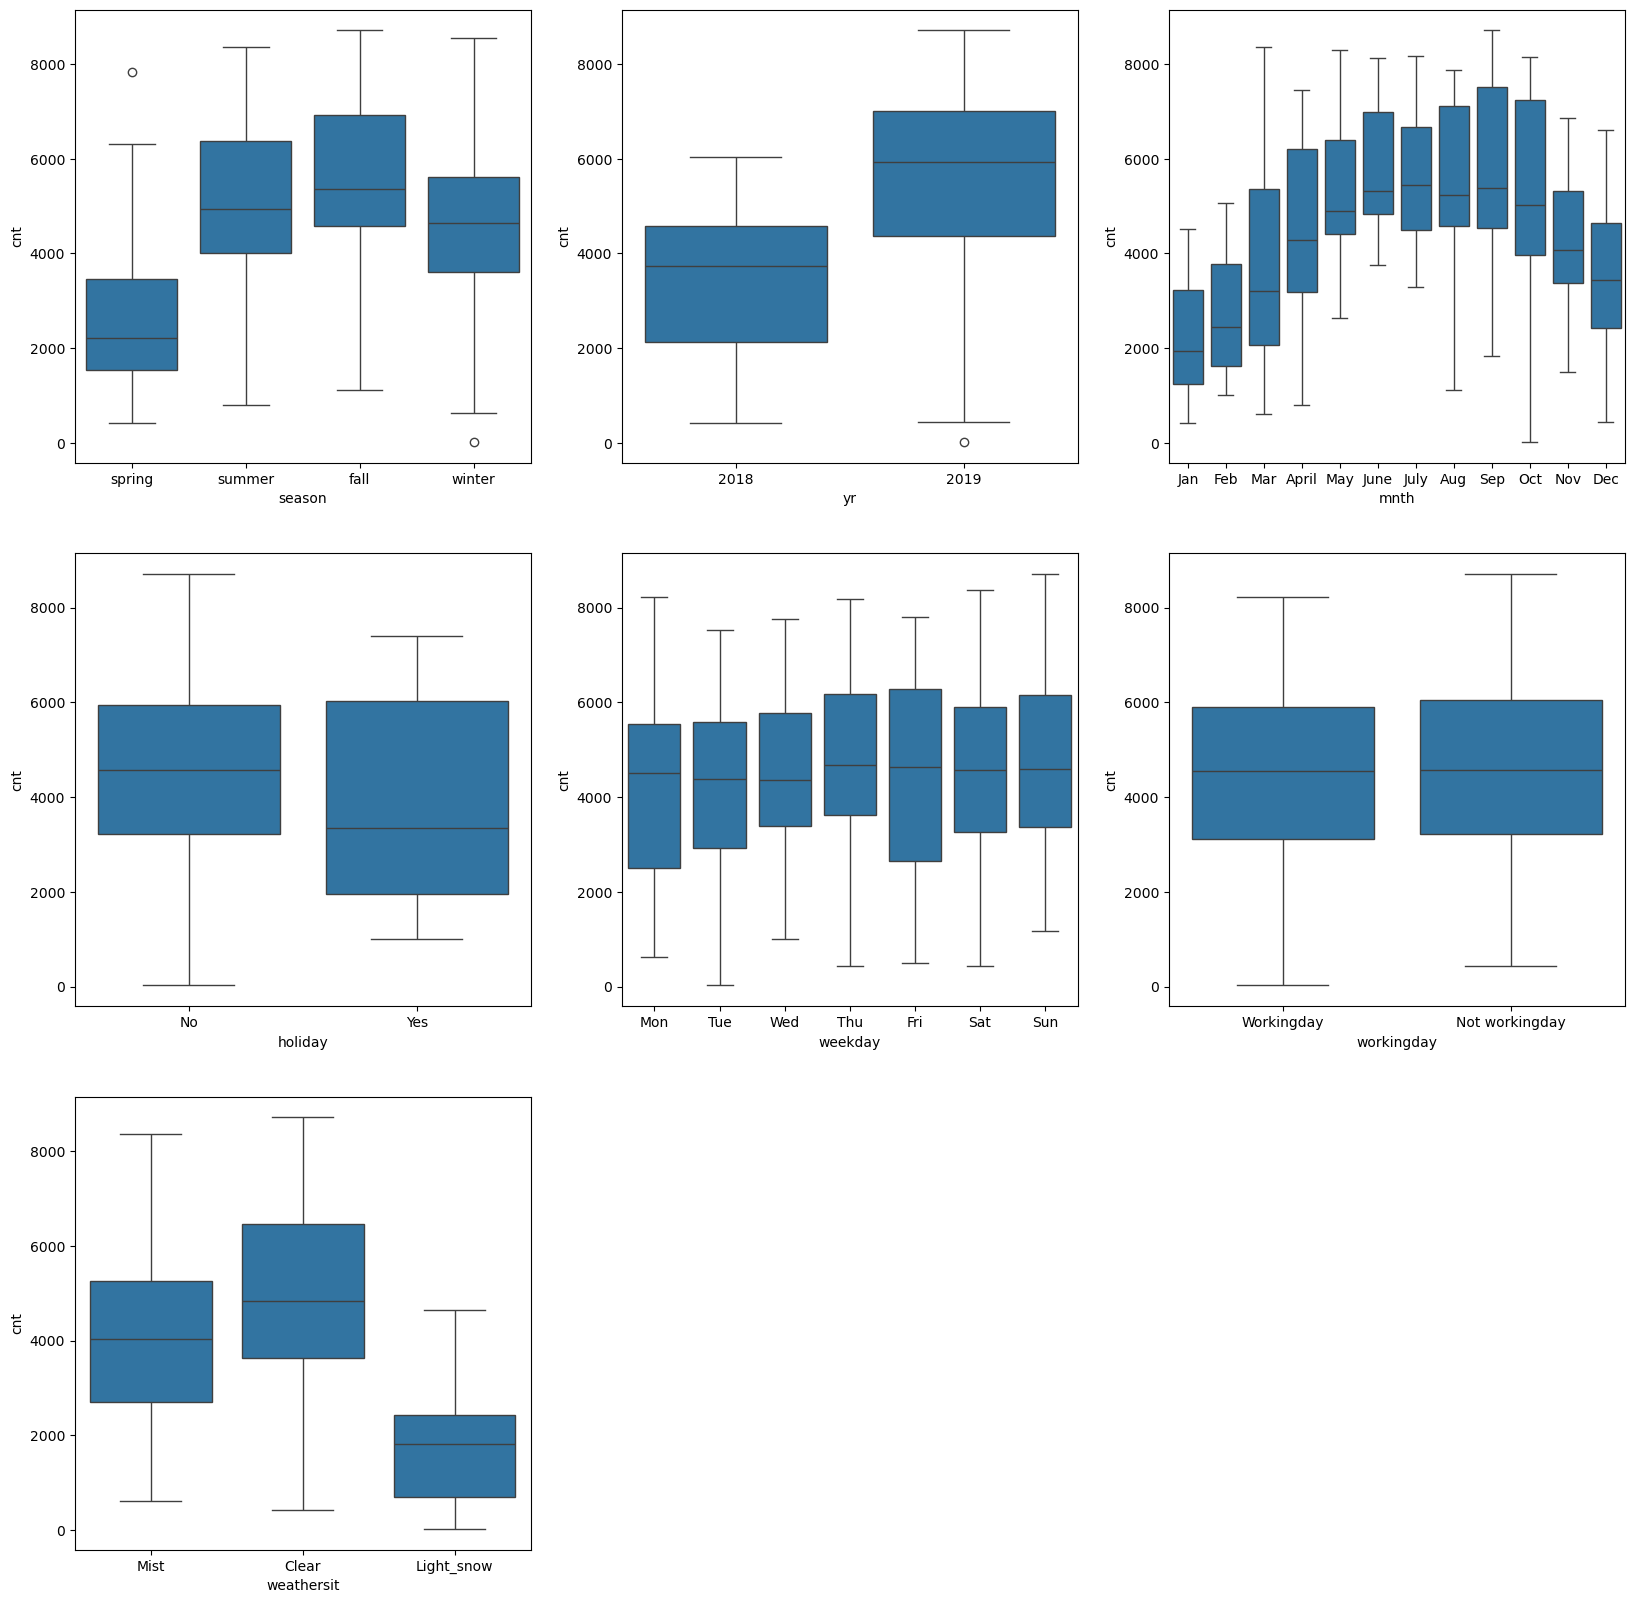

In [463]:
plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = Bike)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = Bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = Bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = Bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = Bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = Bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = Bike)
plt.show()

In [464]:
#data visualization of numerical variables
numerical_variables = Bike.select_dtypes("number").columns
numerical_variables

Index(['temp', 'hum', 'windspeed', 'cnt'], dtype='object')

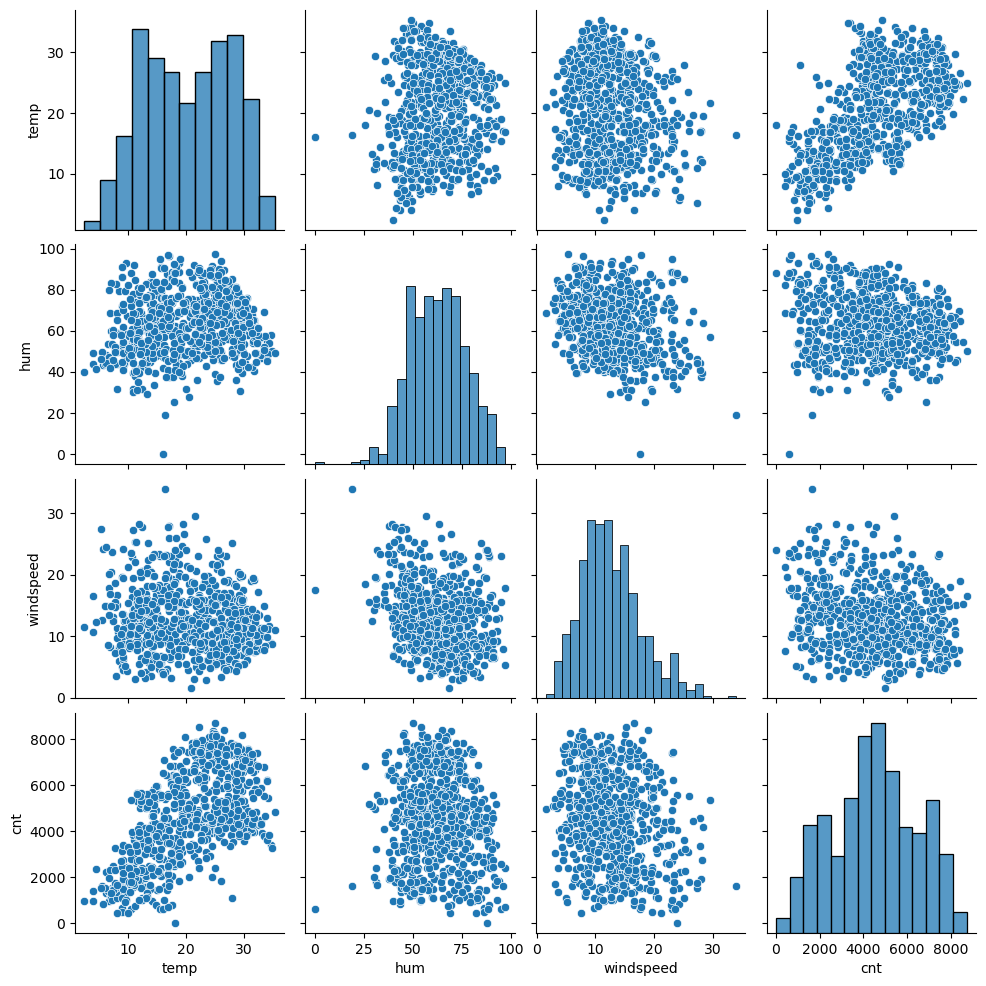

In [465]:
sns.pairplot(data=Bike,vars=['temp', 'hum', 'windspeed', 'cnt'])
plt.show()

<Axes: >

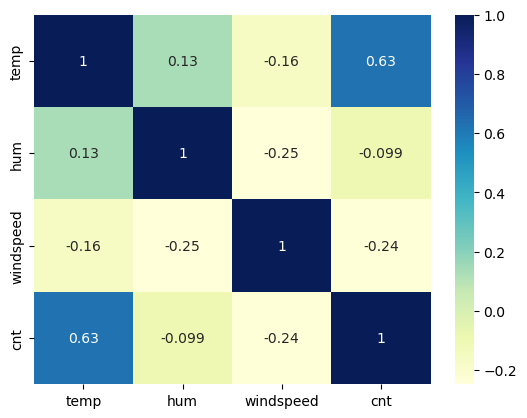

In [466]:
# correlation between the numerical variables
sns.heatmap(Bike[['temp', 'hum', 'windspeed', 'cnt']].corr(),cmap="YlGnBu",annot=True)

In [467]:
#Data Preparation

In [468]:
categorical_variables = Bike.select_dtypes("object").columns
categorical_variables

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

In [469]:
# create dummy variables

In [470]:
Bike = pd.get_dummies(Bike, columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'], drop_first=True, dtype='int')

In [471]:
Bike.head()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Workingday,weathersit_Light_snow,weathersit_Mist
0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [472]:
Bike.columns

Index(['temp', 'hum', 'windspeed', 'cnt', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_July', 'mnth_June', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'holiday_Yes', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'workingday_Workingday', 'weathersit_Light_snow',
       'weathersit_Mist'],
      dtype='object')

In [473]:
#Splitting the Data into Training and Testing Sets

In [474]:
Bike_train, Bike_test = train_test_split(Bike, train_size = 0.7, random_state = 100)

In [475]:
Bike_train.shape

(510, 29)

In [476]:
Bike_test.shape

(220, 29)

In [477]:
#Scaling using MinMaxScaler

In [478]:
scaler = MinMaxScaler()

In [479]:
numerical_variables = ['temp', 'hum', 'windspeed', 'cnt']

In [480]:
Bike_train[numerical_variables] = scaler.fit_transform(Bike_train[numerical_variables])

In [481]:
Bike_train.head()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Workingday,weathersit_Light_snow,weathersit_Mist
576,0.815169,0.725633,0.264686,0.827658,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
426,0.442393,0.640189,0.255342,0.465255,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,0.245101,0.498067,0.663106,0.204096,1,0,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
482,0.395666,0.504508,0.188475,0.482973,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
111,0.345824,0.751824,0.380981,0.191095,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


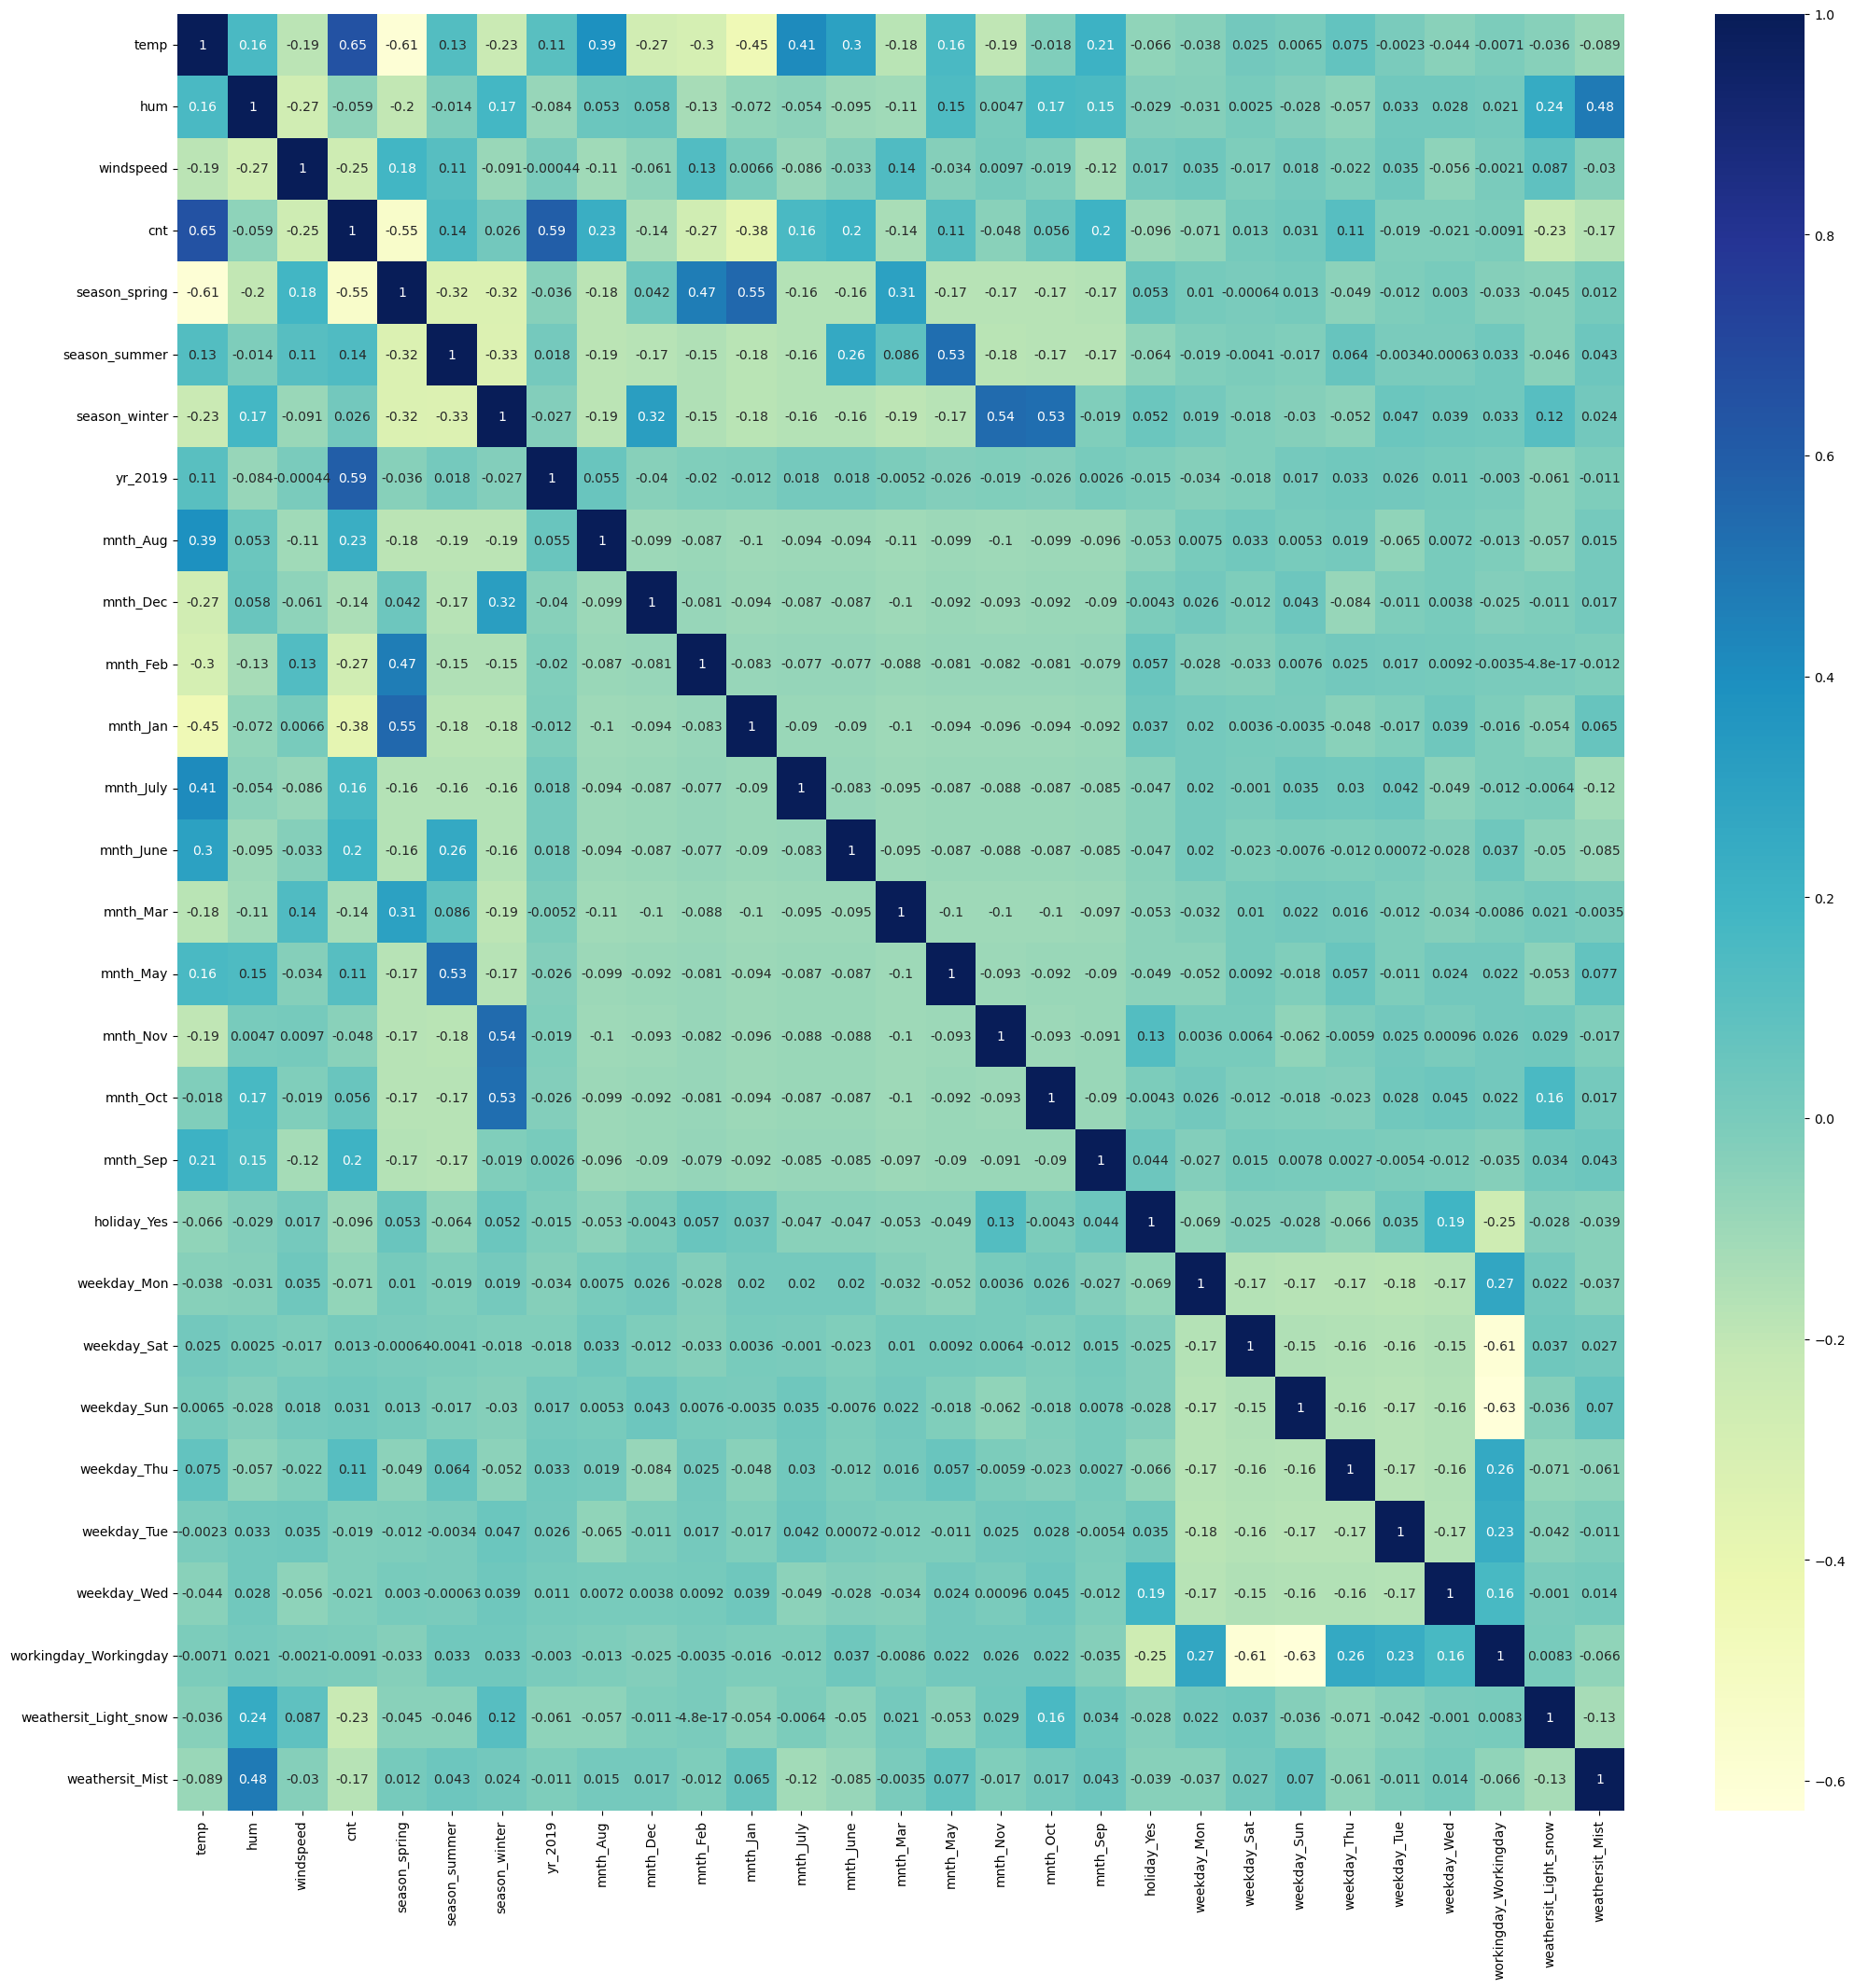

In [482]:
#check correlation between variables
plt.figure(figsize = (25,25))
sns.heatmap(Bike_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

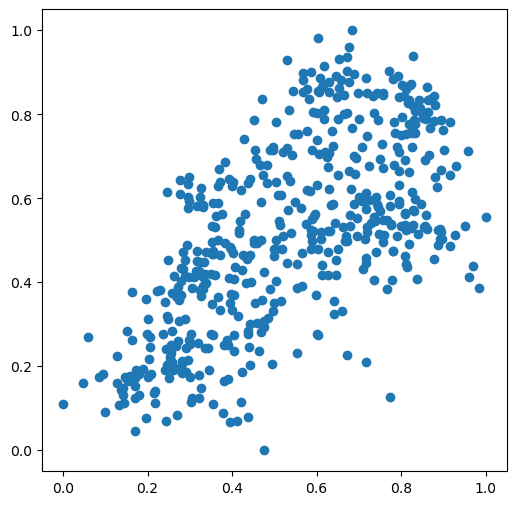

In [483]:
plt.figure(figsize=[6,6])
plt.scatter(Bike_train.temp, Bike_train.cnt)
plt.show()

In [484]:
#model building

In [485]:
y_train = Bike_train.pop("cnt")
X_train = Bike_train

In [486]:
#Model 1: Linear regression

In [487]:
X_train_lm = sm.add_constant(X_train[["temp"]])

lr = sm.OLS(y_train, X_train_lm)

lr_model = lr.fit()

In [488]:
lr_model.params

const    0.169031
temp     0.640944
dtype: float64

In [489]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Sun, 28 Jul 2024   Prob (F-statistic):           2.46e-61
Time:                        18:19:54   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [490]:
#add variable yr_2019

In [491]:
X_train_lm = sm.add_constant(X_train[["temp", "yr_2019"]])

lr = sm.OLS(y_train, X_train_lm)

lr_model = lr.fit()

In [492]:
lr_model.params

const      0.079266
temp       0.584266
yr_2019    0.236739
dtype: float64

In [493]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     568.2
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          3.34e-130
Time:                        18:19:54   Log-Likelihood:                 338.80
No. Observations:                 510   AIC:                            -671.6
Df Residuals:                     507   BIC:                            -658.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0793      0.015      5.321      0.000       0.050       0.109
temp           0.5843      0.025     23.698      0.000       0.536       0.633
yr_2019        0.2367      0.011     21.276      0.000       0.215       0.259
==============================================================================
Omnibus:                       32.310   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.054
Skew:                          -0.513   Prob(JB):                     2.71e-10
Kurtosis:                       4.010   Cond. No.                         6.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [494]:
# use RFE recursive feature elimination

In [495]:

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [496]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_Aug', False, 4),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 6),
 ('mnth_Mar', False, 9),
 ('mnth_May', False, 3),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 7),
 ('mnth_Sep', True, 1),
 ('holiday_Yes', True, 1),
 ('weekday_Mon', False, 2),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 8),
 ('weekday_Tue', True, 1),
 ('weekday_Wed', False, 5),
 ('workingday_Workingday', True, 1),
 ('weathersit_Light_snow', True, 1),
 ('weathersit_Mist', True, 1)]

In [497]:
selected_columns = X_train.columns[rfe.support_]
print(selected_columns)

Index(['temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_July', 'mnth_Nov', 'mnth_Sep', 'holiday_Yes', 'weekday_Sat',
       'weekday_Sun', 'weekday_Tue', 'workingday_Workingday',
       'weathersit_Light_snow', 'weathersit_Mist'],
      dtype='object')


In [498]:
X_train_rfe = X_train[selected_columns]
X_train_rfe.head()

,temp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_Nov,mnth_Sep,holiday_Yes,weekday_Sat,weekday_Sun,weekday_Tue,workingday_Workingday,weathersit_Light_snow,weathersit_Mist
576,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
426,0.442393,0.640189,0.255342,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
728,0.245101,0.498067,0.663106,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
482,0.395666,0.504508,0.188475,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
111,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [499]:
#Model

In [500]:
X_train_new = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train, X_train_new)

lr_model = lr.fit()

In [501]:
lr_model.params

const                    0.379997
temp                     0.462987
hum                     -0.150981
windspeed               -0.186566
season_spring           -0.051572
season_summer            0.040132
season_winter            0.102211
yr_2019                  0.230876
mnth_Dec                -0.046986
mnth_Feb                -0.034758
mnth_Jan                -0.062699
mnth_July               -0.052489
mnth_Nov                -0.041816
mnth_Sep                 0.073661
holiday_Yes             -0.133151
weekday_Sat             -0.042950
weekday_Sun             -0.037032
weekday_Tue             -0.018600
workingday_Workingday   -0.055343
weathersit_Light_snow   -0.253082
weathersit_Mist         -0.057667
dtype: float64

In [502]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     136.5
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          1.90e-185
Time:                        18:19:54   Log-Likelihood:                 519.42
No. Observations:                 510   AIC:                            -996.8
Df Residuals:                     489   BIC:                            -907.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3800      0.081      4.713      0.000       0.222       0.538
temp                      0.4630      0.038     12.149      0.000       0.388       0.538
hum                      -0.1510      0.038     -3.990      0.000      -0.225      -0.077
windspeed                -0.1866      0.026     -7.247      0.000      -0.237      -0.136
season_spring            -0.0516      0.022     -2.345      0.019      -0.095      -0.008
season_summer             0.0401      0.015      2.607      0.009       0.010       0.070
season_winter             0.1022      0.018      5.683      0.000       0.067       0.138
yr_2019                   0.2309      0.008     28.600      0.000       0.215       0.247
mnth_Dec                 -0.0470      0.018     -2.564      0.011      -0.083      -0.011
mnth_Feb                 -0.0348      0.022     -1.607      0.109      -0.077       0.008
mnth_Jan                 -0.0627      0.021     -2.924      0.004      -0.105      -0.021
mnth_July                -0.0525      0.018     -2.882      0.004      -0.088      -0.017
mnth_Nov                 -0.0418      0.019     -2.191      0.029      -0.079      -0.004
mnth_Sep                  0.0737      0.017      4.373      0.000       0.041       0.107
holiday_Yes              -0.1332      0.065     -2.037      0.042      -0.262      -0.005
weekday_Sat              -0.0429      0.071     -0.609      0.543      -0.182       0.096
weekday_Sun              -0.0370      0.070     -0.526      0.599      -0.175       0.101
weekday_Tue              -0.0186      0.011     -1.623      0.105      -0.041       0.004
workingday_Workingday    -0.0553      0.071     -0.783      0.434      -0.194       0.084
weathersit_Light_snow    -0.2531      0.026     -9.582      0.000      -0.305      -0.201
weathersit_Mist          -0.0577      0.010     -5.505      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       78.746   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.978
Skew:                          -0.804   Prob(JB):                     2.50e-41
Kurtosis:                       5.493   Cond. No.                         68.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [503]:
#VIF

In [504]:
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [505]:
X_train_rfe = X_train[selected_columns]

In [506]:
calculateVIF(X_train_rfe)

,Features,VIF
17,workingday_Workingday,47.36
1,hum,38.38
0,temp,28.58
15,weekday_Sun,9.58
14,weekday_Sat,9.20
3,season_spring,7.02
2,windspeed,5.46
5,season_winter,4.90
4,season_summer,3.54
9,mnth_Jan,2.54


In [507]:
#remove workingday_Workingday for high VIF
X_train_new = X_train_rfe.drop(['workingday_Workingday'], axis = 1)

In [508]:
X_train_new = sm.add_constant(X_train_new)

lr = sm.OLS(y_train, X_train_new)

lr_model = lr.fit()

In [509]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     143.8
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          2.12e-186
Time:                        18:19:55   Log-Likelihood:                 519.10
No. Observations:                 510   AIC:                            -998.2
Df Residuals:                     490   BIC:                            -913.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3238      0.037      8.812      0.000       0.252       0.396
temp                      0.4635      0.038     12.171      0.000       0.389       0.538
hum                      -0.1501      0.038     -3.970      0.000      -0.224      -0.076
windspeed                -0.1871      0.026     -7.274      0.000      -0.238      -0.137
season_spring            -0.0511      0.022     -2.326      0.020      -0.094      -0.008
season_summer             0.0403      0.015      2.617      0.009       0.010       0.071
season_winter             0.1022      0.018      5.685      0.000       0.067       0.138
yr_2019                   0.2313      0.008     28.721      0.000       0.215       0.247
mnth_Dec                 -0.0467      0.018     -2.550      0.011      -0.083      -0.011
mnth_Feb                 -0.0344      0.022     -1.591      0.112      -0.077       0.008
mnth_Jan                 -0.0625      0.021     -2.915      0.004      -0.105      -0.020
mnth_July                -0.0525      0.018     -2.885      0.004      -0.088      -0.017
mnth_Nov                 -0.0434      0.019     -2.291      0.022      -0.081      -0.006
mnth_Sep                  0.0740      0.017      4.395      0.000       0.041       0.107
holiday_Yes              -0.0861      0.026     -3.371      0.001      -0.136      -0.036
weekday_Sat               0.0114      0.012      0.939      0.348      -0.013       0.035
weekday_Sun               0.0173      0.012      1.446      0.149      -0.006       0.041
weekday_Tue              -0.0185      0.011     -1.614      0.107      -0.041       0.004
weathersit_Light_snow    -0.2529      0.026     -9.580      0.000      -0.305      -0.201
weathersit_Mist          -0.0575      0.010     -5.494      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       78.442   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.561
Skew:                          -0.806   Prob(JB):                     1.38e-40
Kurtosis:                       5.458   Cond. No.                         21.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [510]:
calculateVIF(X_train_new)

,Features,VIF
0,const,86.54
4,season_spring,5.69
1,temp,4.73
6,season_winter,3.85
5,season_summer,2.82
10,mnth_Jan,2.37
2,hum,1.94
9,mnth_Feb,1.86
12,mnth_Nov,1.82
8,mnth_Dec,1.66


In [511]:
#remove weekday_Sat for high P-value
X_train_new = X_train_new.drop(['weekday_Sat'], axis = 1)

In [512]:
X_train_new = sm.add_constant(X_train_new)

lr = sm.OLS(y_train, X_train_new)

lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     151.7
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          2.63e-187
Time:                        18:19:55   Log-Likelihood:                 518.64
No. Observations:                 510   AIC:                            -999.3
Df Residuals:                     491   BIC:                            -918.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3259      0.037      8.887      0.000       0.254       0.398
temp                      0.4648      0.038     12.214      0.000       0.390       0.540
hum                      -0.1516      0.038     -4.015      0.000      -0.226      -0.077
windspeed                -0.1874      0.026     -7.289      0.000      -0.238      -0.137
season_spring            -0.0505      0.022     -2.298      0.022      -0.094      -0.007
season_summer             0.0404      0.015      2.624      0.009       0.010       0.071
season_winter             0.1023      0.018      5.690      0.000       0.067       0.138
yr_2019                   0.2312      0.008     28.713      0.000       0.215       0.247
mnth_Dec                 -0.0465      0.018     -2.540      0.011      -0.082      -0.011
mnth_Feb                 -0.0349      0.022     -1.617      0.106      -0.077       0.008
mnth_Jan                 -0.0625      0.021     -2.918      0.004      -0.105      -0.020
mnth_July                -0.0525      0.018     -2.883      0.004      -0.088      -0.017
mnth_Nov                 -0.0431      0.019     -2.273      0.023      -0.080      -0.006
mnth_Sep                  0.0742      0.017      4.411      0.000       0.041       0.107
holiday_Yes              -0.0866      0.026     -3.392      0.001      -0.137      -0.036
weekday_Sun               0.0152      0.012      1.291      0.197      -0.008       0.038
weekday_Tue              -0.0205      0.011     -1.823      0.069      -0.043       0.002
weathersit_Light_snow    -0.2518      0.026     -9.548      0.000      -0.304      -0.200
weathersit_Mist          -0.0569      0.010     -5.446      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       78.002   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.342
Skew:                          -0.798   Prob(JB):                     9.35e-41
Kurtosis:                       5.475   Cond. No.                         21.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [513]:
calculateVIF(X_train_new)

,Features,VIF
0,const,86.21
4,season_spring,5.69
1,temp,4.73
6,season_winter,3.85
5,season_summer,2.82
10,mnth_Jan,2.37
2,hum,1.94
9,mnth_Feb,1.86
12,mnth_Nov,1.82
8,mnth_Dec,1.66


In [514]:
#remove weekday_Sun for high P-value
X_train_new = X_train_new.drop(['weekday_Sun'], axis = 1)

In [515]:
X_train_new = sm.add_constant(X_train_new)

lr = sm.OLS(y_train, X_train_new)

lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     160.3
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          4.68e-188
Time:                        18:19:55   Log-Likelihood:                 517.77
No. Observations:                 510   AIC:                            -999.5
Df Residuals:                     492   BIC:                            -923.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3293      0.037      8.998      0.000       0.257       0.401
temp                      0.4647      0.038     12.203      0.000       0.390       0.540
hum                      -0.1539      0.038     -4.077      0.000      -0.228      -0.080
windspeed                -0.1867      0.026     -7.257      0.000      -0.237      -0.136
season_spring            -0.0507      0.022     -2.307      0.021      -0.094      -0.008
season_summer             0.0400      0.015      2.601      0.010       0.010       0.070
season_winter             0.1023      0.018      5.684      0.000       0.067       0.138
yr_2019                   0.2313      0.008     28.717      0.000       0.215       0.247
mnth_Dec                 -0.0458      0.018     -2.499      0.013      -0.082      -0.010
mnth_Feb                 -0.0348      0.022     -1.611      0.108      -0.077       0.008
mnth_Jan                 -0.0628      0.021     -2.927      0.004      -0.105      -0.021
mnth_July                -0.0516      0.018     -2.834      0.005      -0.087      -0.016
mnth_Nov                 -0.0441      0.019     -2.325      0.020      -0.081      -0.007
mnth_Sep                  0.0745      0.017      4.421      0.000       0.041       0.108
holiday_Yes              -0.0870      0.026     -3.408      0.001      -0.137      -0.037
weekday_Tue              -0.0230      0.011     -2.068      0.039      -0.045      -0.001
weathersit_Light_snow    -0.2523      0.026     -9.562      0.000      -0.304      -0.200
weathersit_Mist          -0.0558      0.010     -5.354      0.000      -0.076      -0.035
==============================================================================
Omnibus:                       73.724   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.706
Skew:                          -0.753   Prob(JB):                     4.25e-39
Kurtosis:                       5.460   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [516]:
calculateVIF(X_train_new)

,Features,VIF
0,const,85.77
4,season_spring,5.69
1,temp,4.73
6,season_winter,3.85
5,season_summer,2.82
10,mnth_Jan,2.37
2,hum,1.94
9,mnth_Feb,1.86
12,mnth_Nov,1.81
8,mnth_Dec,1.66


In [517]:
#remove mnth_Feb for high P-value
X_train_new = X_train_new.drop(['mnth_Feb'], axis = 1)

In [518]:
X_train_new = sm.add_constant(X_train_new)

lr = sm.OLS(y_train, X_train_new)

lr_model = lr.fit()
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.6
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          1.28e-188
Time:                        18:19:55   Log-Likelihood:                 516.43
No. Observations:                 510   AIC:                            -998.9
Df Residuals:                     493   BIC:                            -926.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3179      0.036      8.839      0.000       0.247       0.389
temp                      0.4802      0.037     13.014      0.000       0.408       0.553
hum                      -0.1559      0.038     -4.124      0.000      -0.230      -0.082
windspeed                -0.1855      0.026     -7.201      0.000      -0.236      -0.135
season_spring            -0.0602      0.021     -2.843      0.005      -0.102      -0.019
season_summer             0.0433      0.015      2.831      0.005       0.013       0.073
season_winter             0.1040      0.018      5.781      0.000       0.069       0.139
yr_2019                   0.2310      0.008     28.637      0.000       0.215       0.247
mnth_Dec                 -0.0368      0.017     -2.105      0.036      -0.071      -0.002
mnth_Jan                 -0.0441      0.018     -2.440      0.015      -0.080      -0.009
mnth_July                -0.0525      0.018     -2.882      0.004      -0.088      -0.017
mnth_Nov                 -0.0393      0.019     -2.098      0.036      -0.076      -0.002
mnth_Sep                  0.0759      0.017      4.509      0.000       0.043       0.109
holiday_Yes              -0.0894      0.026     -3.501      0.001      -0.140      -0.039
weekday_Tue              -0.0232      0.011     -2.089      0.037      -0.045      -0.001
weathersit_Light_snow    -0.2509      0.026     -9.501      0.000      -0.303      -0.199
weathersit_Mist          -0.0555      0.010     -5.319      0.000      -0.076      -0.035
==============================================================================
Omnibus:                       69.144   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.806
Skew:                          -0.710   Prob(JB):                     1.63e-36
Kurtosis:                       5.395   Cond. No.                         20.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [519]:
calculateVIF(X_train_new)

,Features,VIF
0,const,82.56
4,season_spring,5.27
1,temp,4.42
6,season_winter,3.84
5,season_summer,2.77
2,hum,1.93
11,mnth_Nov,1.77
9,mnth_Jan,1.68
16,weathersit_Mist,1.57
10,mnth_July,1.50


In [520]:

#remove weekday_Tue for high P-value
X_train_new = X_train_new.drop(['weekday_Tue'], axis = 1)

In [521]:
X_train_new = sm.add_constant(X_train_new)

lr = sm.OLS(y_train, X_train_new)

lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          8.15e-189
Time:                        18:19:55   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3197      0.036      8.859      0.000       0.249       0.391
temp                      0.4815      0.037     13.005      0.000       0.409       0.554
hum                      -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed                -0.1887      0.026     -7.315      0.000      -0.239      -0.138
season_spring            -0.0613      0.021     -2.881      0.004      -0.103      -0.019
season_summer             0.0423      0.015      2.761      0.006       0.012       0.072
season_winter             0.1019      0.018      5.656      0.000       0.067       0.137
yr_2019                   0.2304      0.008     28.487      0.000       0.215       0.246
mnth_Dec                 -0.0355      0.018     -2.024      0.043      -0.070      -0.001
mnth_Jan                 -0.0434      0.018     -2.393      0.017      -0.079      -0.008
mnth_July                -0.0553      0.018     -3.030      0.003      -0.091      -0.019
mnth_Nov                 -0.0387      0.019     -2.057      0.040      -0.076      -0.002
mnth_Sep                  0.0755      0.017      4.466      0.000       0.042       0.109
holiday_Yes              -0.0911      0.026     -3.557      0.000      -0.141      -0.041
weathersit_Light_snow    -0.2465      0.026     -9.331      0.000      -0.298      -0.195
weathersit_Mist          -0.0543      0.010     -5.194      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [522]:
calculateVIF(X_train_new)

,Features,VIF
0,const,82.52
4,season_spring,5.27
1,temp,4.42
6,season_winter,3.83
5,season_summer,2.77
2,hum,1.92
11,mnth_Nov,1.77
9,mnth_Jan,1.68
15,weathersit_Mist,1.57
8,mnth_Dec,1.50


In [523]:
#remove mnth_Dec for high P-value
X_train_new = X_train_new.drop(['mnth_Dec'], axis = 1)

In [524]:
X_train_new = sm.add_constant(X_train_new)

lr = sm.OLS(y_train, X_train_new)

lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          4.41e-189
Time:                        18:19:55   Log-Likelihood:                 512.08
No. Observations:                 510   AIC:                            -994.2
Df Residuals:                     495   BIC:                            -930.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3032      0.035      8.598      0.000       0.234       0.373
temp                      0.5055      0.035     14.369      0.000       0.436       0.575
hum                      -0.1697      0.038     -4.497      0.000      -0.244      -0.096
windspeed                -0.1858      0.026     -7.190      0.000      -0.237      -0.135
season_spring            -0.0562      0.021     -2.652      0.008      -0.098      -0.015
season_summer             0.0479      0.015      3.168      0.002       0.018       0.078
season_winter             0.0972      0.018      5.421      0.000       0.062       0.132
yr_2019                   0.2302      0.008     28.371      0.000       0.214       0.246
mnth_Jan                 -0.0341      0.018     -1.936      0.053      -0.069       0.001
mnth_July                -0.0559      0.018     -3.057      0.002      -0.092      -0.020
mnth_Nov                 -0.0236      0.017     -1.362      0.174      -0.058       0.010
mnth_Sep                  0.0802      0.017      4.775      0.000       0.047       0.113
holiday_Yes              -0.0920      0.026     -3.582      0.000      -0.142      -0.042
weathersit_Light_snow    -0.2404      0.026     -9.131      0.000      -0.292      -0.189
weathersit_Mist          -0.0528      0.010     -5.047      0.000      -0.073      -0.032
==============================================================================
Omnibus:                       60.634   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.746
Skew:                          -0.640   Prob(JB):                     7.44e-31
Kurtosis:                       5.211   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [525]:
calculateVIF(X_train_new)

,Features,VIF
0,const,78.35
4,season_spring,5.20
1,temp,3.97
6,season_winter,3.76
5,season_summer,2.68
2,hum,1.90
8,mnth_Jan,1.57
14,weathersit_Mist,1.56
9,mnth_July,1.49
10,mnth_Nov,1.49


In [526]:
#remove mnth_Nov for high P-value
X_train_new = X_train_new.drop(['mnth_Nov'], axis = 1)

In [527]:
X_train_new = sm.add_constant(X_train_new)

lr = sm.OLS(y_train, X_train_new)

lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          7.59e-190
Time:                        18:19:55   Log-Likelihood:                 511.13
No. Observations:                 510   AIC:                            -994.3
Df Residuals:                     496   BIC:                            -935.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2964      0.035      8.483      0.000       0.228       0.365
temp                      0.5124      0.035     14.706      0.000       0.444       0.581
hum                      -0.1681      0.038     -4.452      0.000      -0.242      -0.094
windspeed                -0.1874      0.026     -7.253      0.000      -0.238      -0.137
season_spring            -0.0519      0.021     -2.476      0.014      -0.093      -0.011
season_summer             0.0502      0.015      3.336      0.001       0.021       0.080
season_winter             0.0919      0.018      5.247      0.000       0.057       0.126
yr_2019                   0.2301      0.008     28.339      0.000       0.214       0.246
mnth_Jan                 -0.0333      0.018     -1.892      0.059      -0.068       0.001
mnth_July                -0.0556      0.018     -3.039      0.003      -0.092      -0.020
mnth_Sep                  0.0827      0.017      4.951      0.000       0.050       0.116
holiday_Yes              -0.0963      0.026     -3.773      0.000      -0.146      -0.046
weathersit_Light_snow    -0.2392      0.026     -9.084      0.000      -0.291      -0.187
weathersit_Mist          -0.0526      0.010     -5.025      0.000      -0.073      -0.032
==============================================================================
Omnibus:                       58.633   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.919
Skew:                          -0.626   Prob(JB):                     2.26e-29
Kurtosis:                       5.154   Cond. No.                         19.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [528]:
calculateVIF(X_train_new)

,Features,VIF
0,const,76.76
4,season_spring,5.08
1,temp,3.89
6,season_winter,3.59
5,season_summer,2.65
2,hum,1.90
8,mnth_Jan,1.57
13,weathersit_Mist,1.56
9,mnth_July,1.49
10,mnth_Sep,1.30


In [529]:
#Residual Analysis 

In [530]:
y_train_pred = lr_model.predict(X_train_new)
y_train_pred

576    0.717022
426    0.493252
728    0.392233
482    0.606739
111    0.273471
         ...   
578    0.819906
53     0.254204
350    0.284848
79     0.304088
520    0.658059
Length: 510, dtype: float64

<Axes: ylabel='Density'>

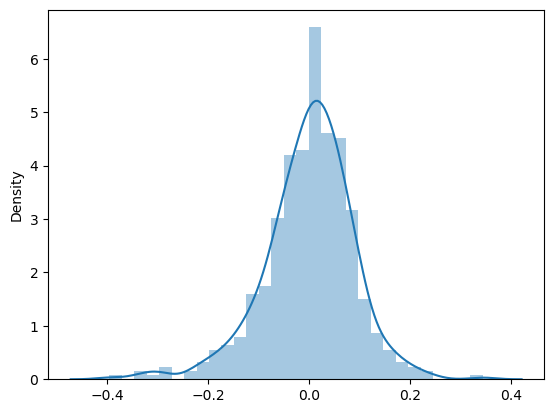

In [531]:
res = y_train - y_train_pred
sns.distplot(res)

Text(0, 0.5, 'res')

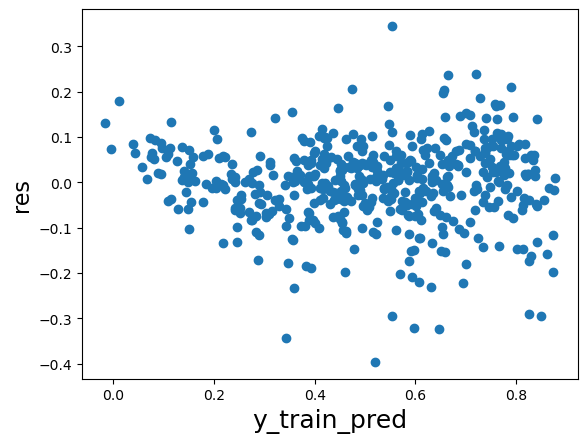

In [532]:
#Validate assumptions

plt.scatter(y_train_pred,res)
plt.xlabel('y_train_pred', fontsize = 18)
plt.ylabel('res', fontsize = 16)

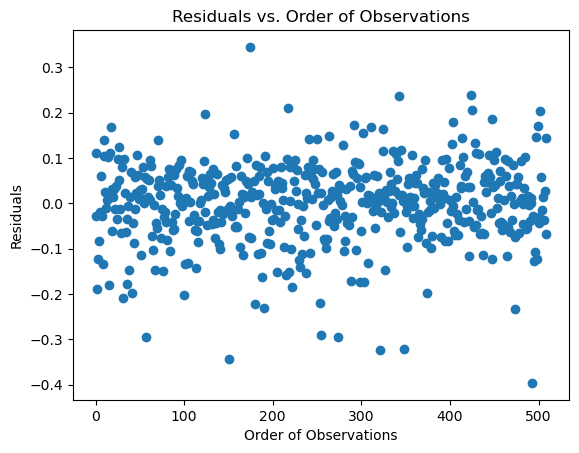

In [533]:
plt.scatter(range(len(res)), res)
plt.title('Residuals vs. Order of Observations')
plt.xlabel('Order of Observations')
plt.ylabel('Residuals')
plt.show()

In [534]:
# Prediction and evaluation on the test data

In [535]:
Bike_test

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Workingday,weathersit_Light_snow,weathersit_Mist
184,29.793347,63.7917,5.459106,6043,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
535,32.082500,59.2083,7.625404,6211,0,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
299,19.270000,81.2917,13.250121,2659,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
221,31.433347,42.4167,13.417286,4780,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
152,29.315000,30.5000,19.583229,4968,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,19.509153,73.3750,11.666643,6606,0,0,1,1,0,1,...,0,0,0,0,0,0,1,1,0,0
127,21.661653,63.1667,5.000712,4333,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
640,26.957500,79.3750,4.458569,7572,0,0,1,1,0,0,...,0,0,0,0,1,0,0,1,0,1
72,13.333897,49.6957,9.174042,2046,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [536]:
numerical_variables = ['temp', 'hum', 'windspeed','cnt']
Bike_test[numerical_variables] = scaler.transform(Bike_test[numerical_variables])
Bike_test.head()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Workingday,weathersit_Light_snow,weathersit_Mist
184,0.831783,0.657364,0.084219,0.692706,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
535,0.901354,0.610133,0.153728,0.712034,0,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
299,0.511964,0.837699,0.334206,0.303382,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
221,0.881625,0.437098,0.339570,0.547400,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
152,0.817246,0.314298,0.537414,0.569029,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [537]:
y_test = Bike_test.pop('cnt')
X_test = Bike_test

In [538]:
X_test2 = sm.add_constant(X_test)

selected_columns = X_train_new.columns

X_test2 = X_test2[selected_columns]

X_test_lm = sm.add_constant(X_test2)
X_test_lm.head()

,const,temp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_Jan,mnth_July,mnth_Sep,holiday_Yes,weathersit_Light_snow,weathersit_Mist
184,1.0,0.831783,0.657364,0.084219,0,0,0,0,0,1,0,1,0,1
535,1.0,0.901354,0.610133,0.153728,0,1,0,1,0,0,0,0,0,0
299,1.0,0.511964,0.837699,0.334206,0,0,1,0,0,0,0,0,0,1
221,1.0,0.881625,0.437098,0.339570,0,0,0,0,0,0,0,0,0,0
152,1.0,0.817246,0.314298,0.537414,0,1,0,0,0,0,0,0,0,0


In [539]:
y_test_pred = lr_model.predict(X_test_lm)

In [540]:
r2 = r2_score(y_test, y_test_pred)
r2

0.8129619858626704

In [541]:
adjusted_r2 = round(1-(1-r2)*(X_test2.shape[0]-1)/(X_test2.shape[0]-X_test2.shape[1]-1),4)
print(adjusted_r2)

0.8002


In [542]:
lr_model.params

const                    0.296412
temp                     0.512418
hum                     -0.168078
windspeed               -0.187384
season_spring           -0.051890
season_summer            0.050206
season_winter            0.091897
yr_2019                  0.230087
mnth_Jan                -0.033302
mnth_July               -0.055623
mnth_Sep                 0.082695
holiday_Yes             -0.096280
weathersit_Light_snow   -0.239224
weathersit_Mist         -0.052598
dtype: float64

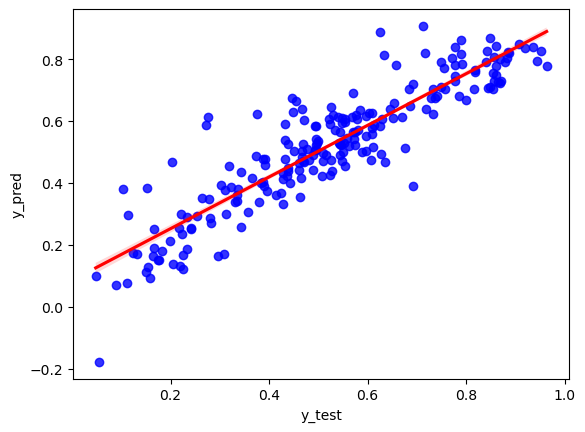

In [543]:
plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel('y_test', fontsize=10)
plt.ylabel('y_pred', fontsize=10)
plt.show()